In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report

In [9]:
training_set=tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/osteosarcoma/dataset/train',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=8,
    image_size=(128, 128),
    shuffle=True,
    seed=0
)


Found 640 files belonging to 3 classes.


In [10]:
# Validation Img processing
validation_set=tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/osteosarcoma/dataset/validate',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=8,
    image_size=(128, 128),
    shuffle=True,
    seed=0
)


Found 231 files belonging to 3 classes.


In [11]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[242.   242.   242.  ]
   [242.   242.   242.  ]
   [242.   242.   242.  ]
   ...
   [242.   242.   242.  ]
   [250.25 243.75 244.75]
   [111.    41.    81.5 ]]

  [[242.5  242.5  242.5 ]
   [242.5  242.5  242.5 ]
   [243.   243.   243.  ]
   ...
   [242.   243.   242.5 ]
   [240.   238.   237.5 ]
   [145.5   79.75 119.  ]]

  [[243.   243.   243.  ]
   [243.   243.   243.  ]
   [242.5  242.5  242.5 ]
   ...
   [243.75 239.25 242.  ]
   [245.25 242.   242.  ]
   [251.5  218.   240.  ]]

  ...

  [[246.5  242.5  243.5 ]
   [243.5  244.5  244.  ]
   [244.   244.   244.  ]
   ...
   [243.   243.   243.  ]
   [244.   242.   243.  ]
   [244.   242.   243.  ]]

  [[243.   243.   243.  ]
   [244.   244.   244.  ]
   [244.   244.   244.  ]
   ...
   [242.5  242.5  242.5 ]
   [238.   243.   238.  ]
   [245.25 242.25 244.25]]

  [[244.   244.   244.  ]
   [244.   244.   244.  ]
   [244.   244.   244.  ]
   ...
   [243.   243.   243.  ]
   [245.75 247.75 248.25]
   [154.   112.75 14

In [12]:
model = Sequential()
model.add(Conv2D(filters=8,kernel_size=6,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Flatten())
model.add(Dense(units=200,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=3,activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.00001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 8)    │           872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       461,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           603 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 486,779 (1.86 MB)

 Trainable params: 486,779 (1.86 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=200)

Epoch 1/200


I0000 00:00:1733551097.891381     103 service.cc:145] XLA service 0x7f63a0004240 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733551097.891444     103 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


10/80 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3654 - loss: 19.0374

I0000 00:00:1733551101.488373     103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.3880 - loss: 20.0570 - val_accuracy: 0.3810 - val_loss: 13.1972
Epoch 2/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4450 - loss: 13.7146 - val_accuracy: 0.3810 - val_loss: 7.8263
Epoch 3/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3954 - loss: 12.4179 - val_accuracy: 0.4286 - val_loss: 3.9321
Epoch 4/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4022 - loss: 9.2320 - val_accuracy: 0.5152 - val_loss: 4.1655
Epoch 5/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4568 - loss: 6.7597 - val_accuracy: 0.5455 - val_loss: 2.4814
Epoch 6/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4356 - loss: 5.2827 - val_accuracy: 0.4935 - val_loss: 3.2389
Epoch 7/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5186 - loss: 4.4813 - val_accuracy: 0.6494 - val_loss: 1.6963
Epoch 8/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5171 - loss: 3.7989 - val_accuracy: 0.6450 - v

In [14]:
train_loss,train_acc = model.evaluate(training_set)


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 0.0200


In [15]:
print(train_loss,train_acc)


0.021330835297703743 0.9984375238418579


In [16]:
val_loss,val_acc=model.evaluate(validation_set)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8009 - loss: 0.7582


In [17]:
model.save("trained_modelff.h5")
model.save("trained_modelff.keras")

In [18]:
training_history.history


{'accuracy': [0.40312498807907104,
  0.42656248807907104,
  0.40312498807907104,
  0.4124999940395355,
  0.4359374940395355,
  0.453125,
  0.5078125,
  0.5328124761581421,
  0.518750011920929,
  0.5625,
  0.581250011920929,
  0.6031249761581421,
  0.598437488079071,
  0.6546875238418579,
  0.6312500238418579,
  0.6343749761581421,
  0.6640625,
  0.6812499761581421,
  0.6703125238418579,
  0.6890624761581421,
  0.6656249761581421,
  0.660937488079071,
  0.699999988079071,
  0.699999988079071,
  0.6890624761581421,
  0.698437511920929,
  0.714062511920929,
  0.707812488079071,
  0.7203124761581421,
  0.7437499761581421,
  0.71875,
  0.731249988079071,
  0.745312511920929,
  0.746874988079071,
  0.770312488079071,
  0.737500011920929,
  0.7406250238418579,
  0.7484375238418579,
  0.7749999761581421,
  0.770312488079071,
  0.776562511920929,
  0.778124988079071,
  0.7734375,
  0.7796875238418579,
  0.8109375238418579,
  0.8031250238418579,
  0.7953125238418579,
  0.807812511920929,
  0.818

In [19]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

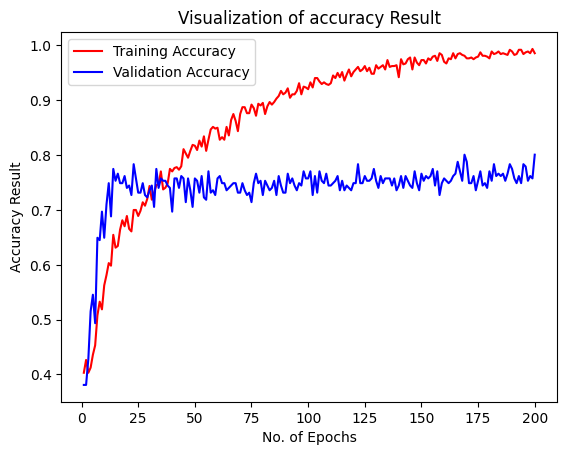

In [20]:
epochs = [i for i in range(1,201)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of accuracy Result")
plt.legend()
plt.show()

In [21]:
class_name = validation_set.class_names
class_name


['Non-Tumor', 'Non-Viable-Tumor', 'Viable']

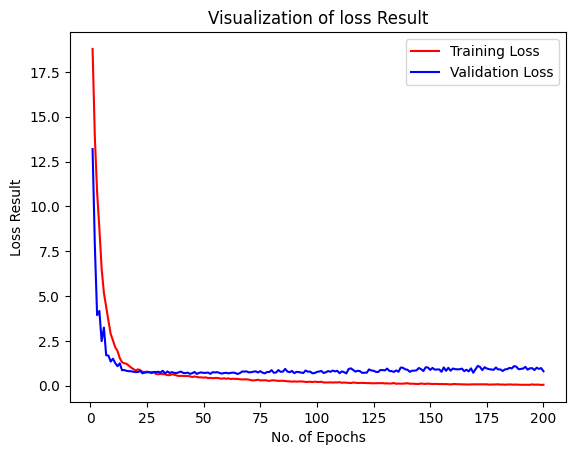

In [22]:
epochs = [i for i in range(1,201)]
plt.plot(epochs,training_history.history['loss'],color='red',label='Training Loss')
plt.plot(epochs,training_history.history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss Result")
plt.title("Visualization of loss Result")
plt.legend()
plt.show()

In [23]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/osteosarcoma/dataset/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 177 files belonging to 3 classes.


In [24]:
import keras
from keras.models import load_model
model = load_model('/kaggle/working/trained_modelff.keras')

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [25]:
y_pred =  model.predict(test_set)
y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step


array([[6.47953823e-02, 3.74380361e-05, 9.35167193e-01],
       [9.99929667e-01, 2.12339635e-09, 7.03028563e-05],
       [6.13231719e-01, 3.79502416e-01, 7.26582110e-03],
       [9.82081592e-01, 1.68834140e-05, 1.79015957e-02],
       [9.61729407e-01, 3.41670415e-07, 3.82702015e-02],
       [7.45401382e-01, 2.43413970e-01, 1.11846309e-02],
       [1.45722464e-01, 8.13727021e-01, 4.05505113e-02],
       [8.38805854e-01, 1.51852623e-03, 1.59675613e-01],
       [9.99883056e-01, 9.26250723e-05, 2.43729064e-05],
       [1.66609868e-01, 8.28948915e-01, 4.44131903e-03],
       [6.83749318e-01, 3.15883845e-01, 3.66908411e-04],
       [7.03141510e-01, 2.85800785e-01, 1.10577587e-02],
       [9.99964237e-01, 3.35793885e-07, 3.54507429e-05],
       [6.95039809e-01, 3.02739710e-01, 2.22054217e-03],
       [9.98712659e-01, 5.18889748e-04, 7.68500147e-04],
       [9.99427319e-01, 1.83133288e-05, 5.54391008e-04],
       [7.58358121e-01, 1.78759944e-06, 2.41640091e-01],
       [9.38463509e-01, 3.22798

In [26]:
y_pred.shape

(177, 3)

In [27]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [28]:
predicted_categories

<tf.Tensor: shape=(177,), dtype=int64, numpy=
array([2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 2, 1, 2, 1, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0,
       0])>

In [29]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(177, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
     

In [30]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

NameError: name 'y_true' is not defined

In [31]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(177,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])>

In [32]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                  precision    recall  f1-score   support

       Non-Tumor       0.80      0.89      0.84        91
Non-Viable-Tumor       0.80      0.79      0.80        42
          Viable       0.74      0.59      0.66        44

        accuracy                           0.79       177
       macro avg       0.78      0.76      0.77       177
    weighted avg       0.79      0.79      0.79       177



In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
cm = confusion_matrix(y_true,predicted_categories)
cm
cm.shape

(3, 3)

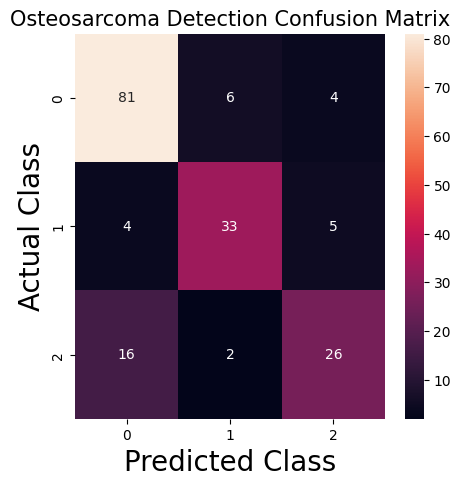

In [35]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Osteosarcoma Detection Confusion Matrix",fontsize=15)
plt.show()

In [36]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model's layers
for layer in base_model.layers:
    layer.trainable = False

# Build the transfer learning model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())  # Replaces Flatten
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [37]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=200)

Epoch 1/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.2314 - loss: 10.9765 - val_accuracy: 0.3117 - val_loss: 5.3966
Epoch 2/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2475 - loss: 8.1052 - val_accuracy: 0.3636 - val_loss: 4.2626
Epoch 3/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3126 - loss: 6.7569 - val_accuracy: 0.3550 - val_loss: 3.7802
Epoch 4/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3497 - loss: 5.7849 - val_accuracy: 0.4156 - val_loss: 3.5745
Epoch 5/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.3979 - loss: 5.8939 - val_accuracy: 0.4545 - val_loss: 3.3420
Epoch 6/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4356 - loss: 4.3691 - val_accuracy: 0.4762 - val_loss: 3.1979
Epoch 7/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4590 - loss: 4.1849 - val_accuracy: 0.4762 - val_loss: 3.0947
Epoch 8/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4670 - loss: 4.2186 - val_accuracy: 0

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9940 - loss: 0.0174
0.02267305925488472 0.9921875
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8509 - loss: 0.7025


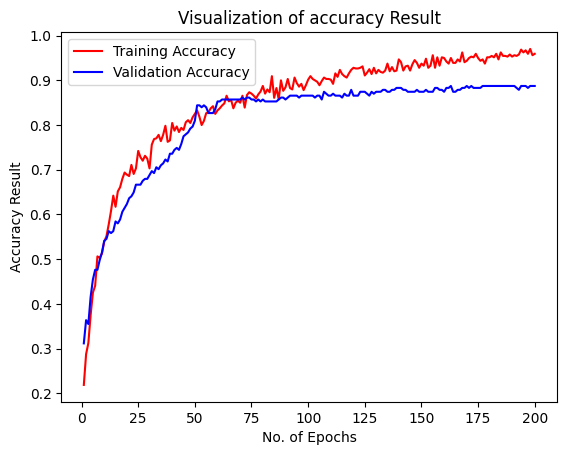

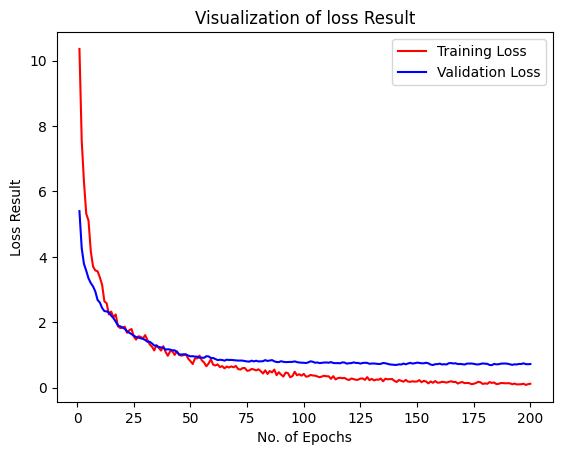

In [38]:
train_loss,train_acc = model.evaluate(training_set)
print(train_loss,train_acc)
val_loss,val_acc=model.evaluate(validation_set)
model.save("trained_modelvgg.h5")
model.save("trained_modelvgg.keras")
training_history.history
import json
with open("training_histvgg.json","w") as f:
    json.dump(training_history.history,f)
	
epochs = [i for i in range(1,201)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of accuracy Result")
plt.legend()
plt.show()
class_name = validation_set.class_names
class_name

epochs = [i for i in range(1,201)]
plt.plot(epochs,training_history.history['loss'],color='red',label='Training Loss')
plt.plot(epochs,training_history.history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss Result")
plt.title("Visualization of loss Result")
plt.legend()
plt.show()

In [39]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/osteosarcoma/dataset/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 177 files belonging to 3 classes.


In [41]:
import keras
from keras.models import load_model
modelvgg = load_model('/kaggle/working/trained_modelvgg.keras')

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [42]:
y_pred =  model.predict(test_set)
y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 439ms/step


array([[9.99556124e-01, 3.55543103e-04, 8.83071407e-05],
       [1.00000000e+00, 3.58415542e-09, 1.48074797e-08],
       [9.99981046e-01, 1.03837519e-05, 8.58645126e-06],
       [9.58908916e-01, 3.13871540e-02, 9.70398076e-03],
       [9.99999881e-01, 8.04130796e-13, 1.14757789e-07],
       [9.99998212e-01, 1.49280459e-06, 2.27871269e-07],
       [9.85289037e-01, 1.46507556e-02, 6.02506479e-05],
       [9.99996305e-01, 3.46703041e-06, 2.13268123e-07],
       [9.99964356e-01, 1.30106419e-05, 2.26867669e-05],
       [3.33010778e-02, 9.17871177e-01, 4.88278382e-02],
       [8.15003991e-01, 9.68125537e-02, 8.81834924e-02],
       [9.99065816e-01, 9.18541919e-04, 1.57001832e-05],
       [9.99998331e-01, 1.71024305e-06, 5.58107445e-08],
       [7.70098686e-01, 2.29898185e-01, 3.12242901e-06],
       [9.99993682e-01, 6.30482600e-06, 3.20926965e-08],
       [9.99999881e-01, 8.27524893e-09, 1.57359622e-07],
       [9.97886717e-01, 2.11131759e-03, 1.90508217e-06],
       [9.99918938e-01, 7.87503

In [43]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [44]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(177, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
     

In [45]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(177,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])>

In [46]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                  precision    recall  f1-score   support

       Non-Tumor       0.92      0.91      0.92        91
Non-Viable-Tumor       0.90      0.88      0.89        42
          Viable       0.85      0.89      0.87        44

        accuracy                           0.90       177
       macro avg       0.89      0.89      0.89       177
    weighted avg       0.90      0.90      0.90       177



In [47]:
cm = confusion_matrix(y_true,predicted_categories)
cm
cm.shape

(3, 3)

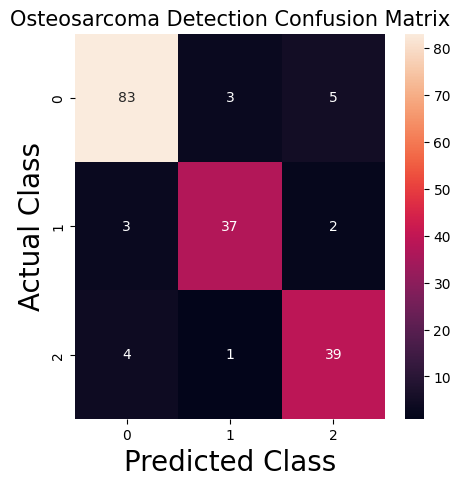

In [48]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Osteosarcoma Detection Confusion Matrix",fontsize=15)
plt.show()

In [49]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2

# Load the model
model_path = '/kaggle/working/trained_modelvgg.h5'
model = load_model(model_path)

# Display the model summary (optional)
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │       102,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           603 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,817,893 (56.53 MB)

 Trainable params: 103,203 (403.14 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2 (12.00 B)

In [61]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2

# Load the model
model_path = '/kaggle/working/trained_modelvgg.h5'
model = load_model(model_path)

# Display the model summary (optional)
model.summary()

from tensorflow.keras.applications.vgg16 import preprocess_input

# Load and preprocess an image for prediction
def preprocess_image(image_path):
    image = cv2.imread(image_path)  # Load the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image = cv2.resize(image, (128, 128))  # Resize to model input size
    image = preprocess_input(image)  # Normalize the image
    return np.expand_dims(image, axis=0)  # Add batch dimension

# Example image path
image_path = '/kaggle/input/osteosarcoma/dataset/test/Non-Viable-Tumor/Case-4-C24-16355-22492.jpg'
input_image = preprocess_image(image_path)
# Predict the class probabilities
predictions = model.predict(input_image)

# Get the class with the highest probability
predicted_class = np.argmax(predictions, axis=1)

print("Predicted Class:", predicted_class)
print("Class Probabilities:", predictions)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: [1]
Class Probabilities: [[0.01362585 0.67439836 0.3119758 ]]


In [66]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load the ResNet50 pre-trained model without the top classification layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model's layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())  # Replaces Flatten for global feature aggregation
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))  # Adjust the number of units for your classes

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [67]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=200)

Epoch 1/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - accuracy: 0.5492 - loss: 1.1847 - val_accuracy: 0.6623 - val_loss: 0.8157
Epoch 2/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8000 - loss: 0.4725 - val_accuracy: 0.7316 - val_loss: 0.6535
Epoch 3/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8775 - loss: 0.3398 - val_accuracy: 0.7489 - val_loss: 0.6224
Epoch 4/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8885 - loss: 0.2856 - val_accuracy: 0.8052 - val_loss: 0.5357
Epoch 5/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8988 - loss: 0.2587 - val_accuracy: 0.8182 - val_loss: 0.5509
Epoch 6/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9164 - loss: 0.1992 - val_accuracy: 0.8052 - val_loss: 0.5954
Epoch 7/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9175 - loss: 0.1914 - val_accuracy: 0.8225 - val_loss: 0.5538
Epoch 8/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9434 - loss: 0.1536 - val_accuracy: 0

80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 1.0000 - loss: 4.3426e-05
3.518464291119017e-05 1.0
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8589 - loss: 1.6230


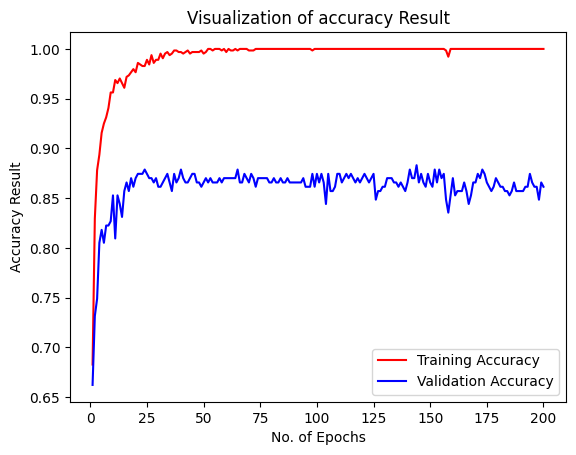

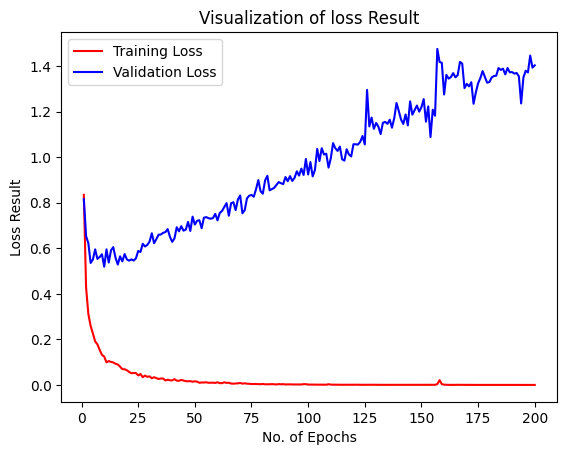

In [69]:
train_loss,train_acc = model.evaluate(training_set)
print(train_loss,train_acc)
val_loss,val_acc=model.evaluate(validation_set)
model.save("trained_modelres.h5")
model.save("trained_modelres.keras")
training_history.history
import json
with open("training_histres.json","w") as f:
    json.dump(training_history.history,f)
	
epochs = [i for i in range(1,201)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of accuracy Result")
plt.legend()
plt.show()
class_name = validation_set.class_names
class_name

epochs = [i for i in range(1,201)]
plt.plot(epochs,training_history.history['loss'],color='red',label='Training Loss')
plt.plot(epochs,training_history.history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss Result")
plt.title("Visualization of loss Result")
plt.legend()
plt.show()

In [71]:
import keras
from keras.models import load_model
modelres = load_model('/kaggle/working/trained_modelres.keras')

In [74]:
y_pred =  modelres.predict(test_set)
y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 544ms/step


array([[1.00000000e+00, 2.49235192e-08, 7.24129368e-10],
       [1.00000000e+00, 2.44802164e-20, 1.49036966e-24],
       [1.94691181e-01, 8.05308819e-01, 3.00317327e-10],
       [9.99999285e-01, 1.13628940e-09, 6.72171666e-07],
       [9.99990702e-01, 6.63397809e-11, 9.25887070e-06],
       [1.00000000e+00, 4.37320183e-13, 1.63545967e-12],
       [9.99999762e-01, 1.93533296e-07, 1.28709967e-08],
       [1.00000000e+00, 2.79283124e-11, 7.19816429e-10],
       [1.00000000e+00, 2.17642973e-10, 2.02362094e-13],
       [3.00564861e-04, 9.99693990e-01, 5.44757904e-06],
       [1.79797038e-01, 8.20202410e-01, 4.57154783e-07],
       [7.66776741e-01, 2.33209834e-01, 1.34732409e-05],
       [1.00000000e+00, 2.33305047e-13, 2.24570838e-15],
       [9.99997735e-01, 2.27620194e-06, 4.00472500e-09],
       [1.00000000e+00, 2.91912297e-19, 2.09029980e-17],
       [1.00000000e+00, 4.93525335e-17, 3.45804404e-16],
       [9.91579652e-01, 2.04118900e-04, 8.21627025e-03],
       [1.00000000e+00, 4.39630

In [75]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(177,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])>

In [76]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                  precision    recall  f1-score   support

       Non-Tumor       0.92      0.91      0.92        91
Non-Viable-Tumor       0.90      0.88      0.89        42
          Viable       0.85      0.89      0.87        44

        accuracy                           0.90       177
       macro avg       0.89      0.89      0.89       177
    weighted avg       0.90      0.90      0.90       177



In [77]:
cm = confusion_matrix(y_true,predicted_categories)
cm
cm.shape

(3, 3)

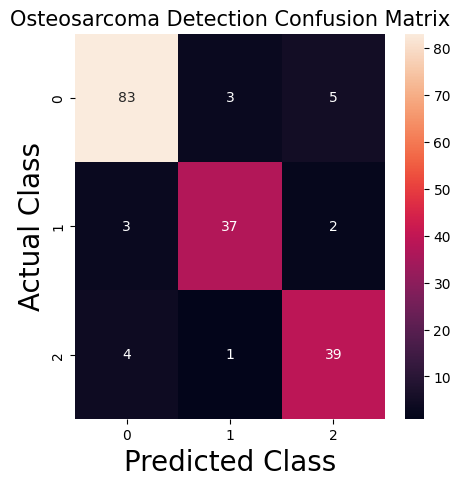

In [78]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Osteosarcoma Detection Confusion Matrix",fontsize=15)
plt.show()

In [81]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2

# Load the model
model_path = '/kaggle/working/trained_modelres.h5'
model = load_model(model_path)

# Display the model summary (optional)
model.summary()

from tensorflow.keras.applications.vgg16 import preprocess_input

# Load and preprocess an image for prediction
def preprocess_image(image_path):
    image = cv2.imread(image_path)  # Load the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image = cv2.resize(image, (128, 128))  # Resize to model input size
    image = preprocess_input(image)  # Normalize the image
    return np.expand_dims(image, axis=0)  # Add batch dimension

# Example image path
image_path = '/kaggle/input/osteosarcoma/dataset/test/Non-Viable-Tumor/Case-4-C31-22851-36922.jpg'
input_image = preprocess_image(image_path)
# Predict the class probabilities
predictions = model.predict(input_image)

# Get the class with the highest probability
predicted_class = np.argmax(predictions, axis=1)

print("Predicted Class:", predicted_class)
print("Class Probabilities:", predictions)



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 4, 4, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,113,029 (91.98 MB)

 Trainable params: 525,315 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: [2]
Class Probabilities: [[1.0357849e-02 6.0755119e-04 9.8903465e-01]]
